In [1]:
    
import sympy as sp  # Library to work with symbolic variables
from scipy import optimize
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Function to calculate symbolic denavit transformations from parameters

def symTfromDH(theta, d, a, alpha):

    Rz = sp.Matrix([[sp.cos(theta), -sp.sin(theta), 0, 0],
                   [sp.sin(theta), sp.cos(theta), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])
    tz = sp.Matrix([[1, 0, 0, 0],
                   [0, 1, 0, 0],
                   [0, 0, 1, d],
                   [0, 0, 0, 1]])
    ta = sp.Matrix([[1, 0, 0, a],
                   [0, 1, 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])
    Rx = sp.Matrix([[1, 0, 0, 0],
                   [0, sp.cos(alpha), -sp.sin(alpha), 0],
                   [0, sp.sin(alpha), sp.cos(alpha), 0],
                   [0, 0, 0, 1]])
    T = Rz*tz*ta*Rx
    return T

## Calculate Denavit Transformations

In [3]:
# Robot dimensions
L0 = 48#48
L1 = 150
L2 = 100
L3 = 40
L4 = 75

q01 = sp.symbols('q01') # First rotational joint angle
q02 = sp.symbols('q02') # Z axis rotational second link 
q03 = sp.symbols('q03') # X axis rotational second link 

# Calculated denavit parameters
theta0 = [0,0,q01,q02+sp.pi/2,0,-sp.pi/2]
d0 = [L4-L0,0,0,0,0,0]
a0 = [0,L3,L2,0,0,L1] 
alpha0 = [-sp.pi/2,0,0,0,q03,0]

# Partial transformations to end effector
T0_01 = symTfromDH(theta0[0],d0[0],a0[0],alpha0[0])
T0_12 = symTfromDH(theta0[1],d0[1],a0[1],alpha0[1])
T0_23 = symTfromDH(theta0[2],d0[2],a0[2],alpha0[2])

T0_34 = symTfromDH(theta0[3],d0[3],a0[3],alpha0[3])
T0_45 = symTfromDH(theta0[4],d0[4],a0[4],alpha0[4])
T0_56 = symTfromDH(theta0[5],d0[5],a0[5],alpha0[5])

T0_03 = T0_01*T0_12*T0_23
# Final tranformation
T0_06 = T0_01*T0_12*T0_23*T0_34*T0_45*T0_56
T0_06.simplify()
T0_06



Matrix([
[ cos(q03)*cos(q01 + q02), -sin(q01 + q02),  sin(q03)*cos(q01 + q02),  100*cos(q01) + 150*cos(q03)*cos(q01 + q02) + 40],
[               -sin(q03),               0,                 cos(q03),                                    -150*sin(q03)],
[-sin(q01 + q02)*cos(q03), -cos(q01 + q02), -sin(q03)*sin(q01 + q02), -100*sin(q01) - 150*sin(q01 + q02)*cos(q03) + 27],
[                       0,               0,                        0,                                                1]])

In [4]:
q11 = sp.symbols('q11') # First rotational joint angle
q12 = sp.symbols('q12') # Z axis rotational second link 
q13 = sp.symbols('q13') # X axis rotational second link 

# Calculated denavit parameters
theta1 = [0,0,0,q11,q12+sp.pi/2,0,-sp.pi/2]
d1 = [0,L4-L0,0,0,0,0,0]
a1 = [0,0,L3,L2,0,0,L1] 
alpha1 = [sp.pi*2/3,-sp.pi/2,0,0,0,q13,0]

# Partial transformations to end effector
T1_00 = symTfromDH(theta1[0],d1[0],a1[0],alpha1[0])
T1_01 = symTfromDH(theta1[1],d1[1],a1[1],alpha1[1])
T1_12 = symTfromDH(theta1[2],d1[2],a1[2],alpha1[2])
T1_23 = symTfromDH(theta1[3],d1[3],a1[3],alpha1[3])

T1_34 = symTfromDH(theta1[4],d1[4],a1[4],alpha1[4])
T1_45 = symTfromDH(theta1[5],d1[5],a1[5],alpha1[5])
T1_56 = symTfromDH(theta1[6],d1[6],a1[6],alpha1[6])

T1_03 = T1_00*T1_01*T1_12*T1_23
# Final tranformation
T1_06 = T1_00*T1_01*T1_12*T1_23*T1_34*T1_45*T1_56
T1_06.simplify()
T1_06

Matrix([
[                        cos(q13)*cos(q11 + q12),          -sin(q11 + q12),                        sin(q13)*cos(q11 + q12),                                       100*cos(q11) + 150*cos(q13)*cos(q11 + q12) + 40],
[ sin(q13)/2 + sqrt(3)*sin(q11 + q12)*cos(q13)/2, sqrt(3)*cos(q11 + q12)/2, sqrt(3)*sin(q13)*sin(q11 + q12)/2 - cos(q13)/2, 50*sqrt(3)*sin(q11) + 75*sin(q13) + 75*sqrt(3)*sin(q11 + q12)*cos(q13) - 27*sqrt(3)/2],
[-sqrt(3)*sin(q13)/2 + sin(q11 + q12)*cos(q13)/2,         cos(q11 + q12)/2, sin(q13)*sin(q11 + q12)/2 + sqrt(3)*cos(q13)/2,                 50*sin(q11) - 75*sqrt(3)*sin(q13) + 75*sin(q11 + q12)*cos(q13) - 27/2],
[                                              0,                        0,                                              0,                                                                                     1]])

In [5]:
q21 = sp.symbols('q21') # First rotational joint angle
q22 = sp.symbols('q22') # Z axis rotational second link 
q23 = sp.symbols('q23') # X axis rotational second link 

# Calculated denavit parameters
theta2 = [0,0,0,q21,q22+sp.pi/2,0,-sp.pi/2]
d2 = [0,L4-L0,0,0,0,0,0]
a2 = [0,0,L3,L2,0,0,L1] 
alpha2 = [-sp.pi*2/3,-sp.pi/2,0,0,0,q23,0]

# Partial transformations to end effector
T2_00 = symTfromDH(theta2[0],d2[0],a2[0],alpha2[0])
T2_01 = symTfromDH(theta2[1],d2[1],a2[1],alpha2[1])
T2_12 = symTfromDH(theta2[2],d2[2],a2[2],alpha2[2])
T2_23 = symTfromDH(theta2[3],d2[3],a2[3],alpha2[3])

T2_34 = symTfromDH(theta2[4],d2[4],a2[4],alpha2[4])
T2_45 = symTfromDH(theta2[5],d2[5],a2[5],alpha2[5])
T2_56 = symTfromDH(theta2[6],d2[6],a2[6],alpha2[6])

T2_03 = T2_00*T2_01*T2_12*T2_23
# Final tranformation
T2_06 = T2_00*T2_01*T2_12*T2_23*T2_34*T2_45*T2_56
T2_06.simplify()
T2_06

Matrix([
[                       cos(q23)*cos(q21 + q22),           -sin(q21 + q22),                         sin(q23)*cos(q21 + q22),                                        100*cos(q21) + 150*cos(q23)*cos(q21 + q22) + 40],
[sin(q23)/2 - sqrt(3)*sin(q21 + q22)*cos(q23)/2, -sqrt(3)*cos(q21 + q22)/2, -sqrt(3)*sin(q23)*sin(q21 + q22)/2 - cos(q23)/2, -50*sqrt(3)*sin(q21) + 75*sin(q23) - 75*sqrt(3)*sin(q21 + q22)*cos(q23) + 27*sqrt(3)/2],
[sqrt(3)*sin(q23)/2 + sin(q21 + q22)*cos(q23)/2,          cos(q21 + q22)/2,  sin(q23)*sin(q21 + q22)/2 - sqrt(3)*cos(q23)/2,                  50*sin(q21) + 75*sqrt(3)*sin(q23) + 75*sin(q21 + q22)*cos(q23) - 27/2],
[                                             0,                         0,                                               0,                                                                                      1]])

## Direct Kinematics

In [6]:
values ={     
q01:0,
q02:0,
q03:0,
}

T0_06.evalf(subs=values)

Matrix([
[1.0,    0,   0, 290.0],
[  0,    0, 1.0,     0],
[  0, -1.0,   0,  27.0],
[  0,    0,   0,   1.0]])

In [7]:
# Evaluate end effector transformation
#1.373492839990343 q2 0.010033453033146945 l1 4.003660654923575
values ={     
q11:0,
q12:0,
q13:0,
}

T1_06.evalf(subs=values)

Matrix([
[1.0,                 0,                 0,             290.0],
[  0, 0.866025403784439,              -0.5, -23.3826859021798],
[  0,               0.5, 0.866025403784439,             -13.5],
[  0,                 0,                 0,               1.0]])

In [8]:
# Evaluate random positions to plot the work volume
N_POINTS = 500
points0 = np.zeros([N_POINTS,3])
points1 = np.zeros([N_POINTS,3])
points2 = np.zeros([N_POINTS,3])
for i in range(N_POINTS):
    values =[np.random.uniform(0,0),np.random.uniform(0,0),np.random.uniform(0,2*sp.pi)] 

    points0[i,0:3] = (np.array(T0_06.evalf(subs={q01:values[0],q02:values[1],q03:values[2]})[0:3,3]).squeeze())
    points1[i,0:3] = (np.array(T1_06.evalf(subs={q11:values[0],q12:values[1],q13:values[2]})[0:3,3]).squeeze())
    points2[i,0:3] = (np.array(T2_06.evalf(subs={q21:values[0],q22:values[1],q23:values[2]})[0:3,3]).squeeze())

Text(0.5, 0, 'z')

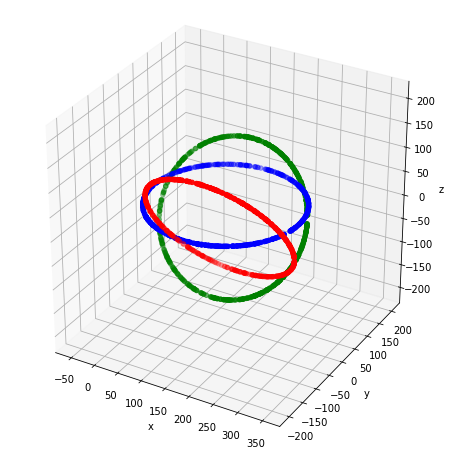

In [20]:
plt.ion()
plt.rcParams['figure.figsize'] = (16,8)
ax =plt.axes(projection='3d')
ax.set_box_aspect(aspect=(1,1,1)) 
ax.scatter3D(points0[:,0],points0[:,1],points0[:,2],c='blue')
ax.scatter3D(points1[:,0],points1[:,1],points1[:,2],c='red')
ax.scatter3D(points2[:,0],points2[:,1],points2[:,2],c='green')
ax.set_xlim(-75,375)
ax.set_ylim(-225,225)
ax.set_zlim(-225,225)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=270,azim=270) # Sphere with center in Joint 1 .(radio = 150 (link 2) )


In [10]:
# Define end effector postition

def eqs(q):
    q2 = q[1]
    q3 = q[2]
    f = np.zeros(3)
    f[0] = -150*np.sin(q3)
    f[1] = 0 - Y
    f[2] = -l1*np.cos(q1 + q2) + 600*np.sin(q1) + 400*np.sin(q1 + q2)+300 - Z
    return f

## Inverse Kinematics

In [11]:
# Define end effector postition

X = 200
Y = 0
Z = 1300

def eqs(q):
    q1 = q[0]
    q2 = q[1]
    l1 = q[2]
    f = np.zeros(3)
    f[0] = l1*np.sin(q1 + q2) + 600*np.cos(q1) + 400*np.cos(q1 + q2)  -X
    f[1] = 0 - Y
    f[2] = -l1*np.cos(q1 + q2) + 600*np.sin(q1) + 400*np.sin(q1 + q2)+300 - Z
    return f

In [12]:
q=optimize.fsolve(eqs,[1,1,1])
print(f'q1 {q[0]} q2 {q[1]} l1 {q[2]} ')

q1 1.373492839990343 q2 0.010033453033146945 l1 4.003660654923575 


/home/nadaol/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
